## Figure 2a:
### The evolution of Earth-Moon distance

3.4777053041091073e+34
8.015207598061417e+37


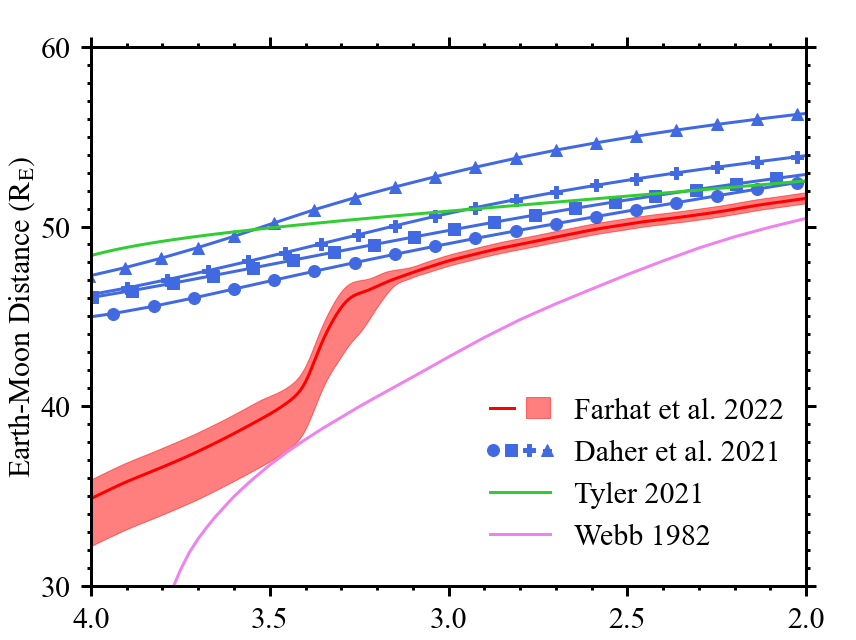

In [1]:
from matplotlib.legend_handler import HandlerTuple
import matplotlib.pyplot as PLT
import matplotlib.ticker as TICK
import numpy as NP
import pandas as PD
from scipy.interpolate import CubicSpline as CSINTP
from scipy.interpolate import Akima1DInterpolator as AKINTP
import scipy.io 

def interpolate_distance(index, time_interp_point):
        data_MC = scipy.io.loadmat("Data_Daher2021/SchindeleggerResults_MonteCarlo/"+
                        f"integration_results_use_Schindelegger_MonteCarlo{index:03}_ode45_v9.mat")
        time_MC = data_MC['timestep_vector'].flatten() / (86400 * 365.25 * 10**9)
        a_RE_MC = data_MC['StateVector'][:, 2] / 6378136
        interp_func_a = CSINTP(time_MC, a_RE_MC)
        a_interp = interp_func_a(time_interp_point)
        return a_interp

#---------------------------#
#Universal Figure Parameters#
#---------------------------#
PLT.rcParams['font.family'] = 'serif' ##rc: runtime configuration
PLT.rcParams['font.serif'] = ['Times New Roman']
PLT.rcParams['mathtext.fontset'] = 'stix' ##Times-like font used in mathtext
fig, ax = PLT.subplots(figsize=(12,9))
labelsize_ax = 30
ticksize_ax = 30
legendsize_ax = 30
textsize_ax = 30
linewidth_ax = 3
markersize_ax = 12
borderwidth_ax = 3

#-----------------------------#
#Basic Parameters for the Moon#
#-----------------------------#
Rotation_Velocity = 7.2921e-5
G_Constant = 6.6738e-11
Mass_Earth = 5.9726e24 
Mass_Moon = 7.3463e22
Radius_Earth = 6.378e6##6371e3
Distance_EM = 3.84399e8
Moment_Inertia_Earth = 0.3299 * Mass_Earth * Radius_Earth**2
Angular_Momentum = Moment_Inertia_Earth*Rotation_Velocity + Mass_Moon*(G_Constant*(Mass_Moon+Mass_Earth)*Distance_EM)**(1/2)
Time_unit = 365 * 24 * 60 * 60 * 1e9
Distance_unit = Distance_EM / Radius_Earth

#----------------------------------------------#
#plot Webb, 1982#
#https://github.com/trichter/archean_moon_orbit#
#----------------------------------------------#
models = NP.load('Data_From_Eulenfeld&Heubeck/data/orbit_models.npz')
data_Webb = models['Webb 1982 curve d'] ## Time (Ga); Distance (normalized by present-day value)
time_Webb = data_Webb[0]
a_RE_Webb = data_Webb[1] * Distance_unit

Webb1982, = ax.plot(time_Webb, a_RE_Webb, 
                    color='violet', linewidth=linewidth_ax, label="Webb, 1982", linestyle='-', zorder=2)

#---------------------------------------------------------------#
#plot Daher et al., 2021        #
#data interpolation & derivation#
#https://deepblue.lib.umich.edu/data/concern/data_sets/sj1392193#
#---------------------------------------------------------------#
color_Daher = 'royalblue'

#ocean basin geometries of 252 Ma#
data_252Ma = scipy.io.loadmat('Data_Daher2021/integration_results_use_Schindelegger_252Ma_experiments_ode45_nodeLF_v9.mat')
time_252Ma = data_252Ma['timestep_vector_252Ma_ode45'].flatten() / (86400 * 365.25 * 10**9)
a_RE_252Ma = data_252Ma['StateVector_252Ma_ode45'][:, 2] / 6378136
Daher_252Ma, = ax.plot(time_252Ma, a_RE_252Ma, color=color_Daher, linestyle='-', marker='^',markersize=markersize_ax,
                         linewidth=linewidth_ax, label="Daher et al. 2021", zorder=1)

#ocean basin geometries of 116 Ma#
data_116Ma = scipy.io.loadmat('Data_Daher2021/integration_results_use_Schindelegger_116Ma_experiments_ode45_nodeLF_v9.mat')
time_116Ma = data_116Ma['timestep_vector_116Ma_ode45'].flatten() / (86400 * 365.25 * 10**9)
a_RE_116Ma = data_116Ma['StateVector_116Ma_ode45'][:, 2] / 6378136
Daher_116Ma, = ax.plot(time_116Ma, a_RE_116Ma, color=color_Daher, linestyle='-', marker='P',markersize=markersize_ax,
                         linewidth=linewidth_ax, label="Daher et al. 2021", zorder=1)

#ocean basin geometries of 55 Ma#
data_55Ma = scipy.io.loadmat('Data_Daher2021/integration_results_use_Schindelegger_55Ma_experiments_ode45_nodeLF_v9.mat')
time_55Ma = data_55Ma['timestep_vector_55Ma_ode45'].flatten() / (86400 * 365.25 * 10**9)
a_RE_55Ma = data_55Ma['StateVector_55Ma_ode45'][:, 2] / 6378136
Daher_55Ma, = ax.plot(time_55Ma, a_RE_55Ma, color=color_Daher, linestyle='-',marker='s',markersize=markersize_ax,
                         linewidth=linewidth_ax, label="Daher et al. 2021", zorder=1)

#ocean basin geometries of present-day#
data_PD = scipy.io.loadmat('Data_Daher2021/integration_results_use_Schindelegger_PD_experiments_ode45_nodeLF_v9.mat')
time_PD = data_PD['timestep_vector_PD_ode45'].flatten() / (86400 * 365.25 * 10**9)
a_RE_PD = data_PD['StateVector_PD_ode45'][:, 2] / 6378136
Daher_PD, = ax.plot(time_PD, a_RE_PD, color=color_Daher, linestyle='-', marker='o',markersize=markersize_ax,
                         linewidth=linewidth_ax, label="Daher et al. 2021", zorder=1)

#----------------------------------------------#
#plot Tyler et al., 2021#
#https://github.com/trichter/archean_moon_orbit#
#----------------------------------------------#
data_Tyler_T50 = models['Tyler 2021 T=50']
data_Tyler_T40 = models['Tyler 2021 T=40']
data_Tyler_T30 = models['Tyler 2021 T=30']
#Best-fit values: h=2.3 km and T=40#
Tyler2021_40, = ax.plot(data_Tyler_T40[0], data_Tyler_T40[1]*Distance_unit, 
                        color='limegreen', linewidth=linewidth_ax, label="Tyler (2021)", linestyle='-', zorder=2)

#------------------------------------#
#plot Farhat et al., 2022#
#https://www.astrogeo.eu/?page_id=553#
#------------------------------------#
path_data_Farhat = ('Farhat_2022.csv')
data_Farhat = NP.loadtxt(path_data_Farhat, delimiter=',', skiprows=1) 
time_Farhat = data_Farhat[:,0] #Column 0: Ga; 
a_RE_middle = data_Farhat[:,1] #Column 1: a(RE);
a_RE_max = data_Farhat[:,2] #Column 2: amax;
a_RE_min = data_Farhat[:,3] #Column 3: amin

middle_line, = ax.plot(time_Farhat, a_RE_middle, linestyle='-', zorder=2,
                       color='red', linewidth=linewidth_ax, label="Farhat et al. (2022)")

envelope = ax.fill_between(time_Farhat, a_RE_min, a_RE_max, color='red', alpha=0.5, zorder=2)

#------------------------------#
#Universal Figure configuration#
#------------------------------#
ax.set_xlim(4.0,2.0)
ax.set_ylim(30,60)
ax.xaxis.set_major_locator(TICK.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(TICK.MultipleLocator(0.1))
ax.yaxis.set_major_locator(TICK.MultipleLocator(10))
ax.yaxis.set_minor_locator(TICK.MultipleLocator(1))
ax.tick_params(axis='both',direction='out',length=10,labelsize=ticksize_ax,pad=10,which='both',width=borderwidth_ax)
ax.tick_params(axis='both',direction='out',length=4,labelsize=ticksize_ax,which='minor',width=borderwidth_ax)
#ax.set_xlabel(f"Geological Time (Ga)",fontsize=labelsize_ax)
ax.set_ylabel(r"Earth-Moon Distance ${(\mathrm{R_E})}$",fontsize=labelsize_ax)
## top x axis
ax2=ax.twiny()
ax2.set_xlim(4.0,2.0)
ax2.xaxis.set_major_locator(TICK.MultipleLocator(0.5))
ax2.xaxis.set_minor_locator(TICK.MultipleLocator(0.1))
ax2.tick_params(axis='both',direction='out',which='both',length=10,labelsize=ticksize_ax,labelcolor='none',width=borderwidth_ax)
ax2.tick_params(axis='both',direction='out',which='minor',length=4,labelsize=ticksize_ax,width=borderwidth_ax) ##necessary
## right y axis
ax3=ax.twinx()
ax3.set_ylim(30,60) 
ax3.yaxis.set_major_locator(TICK.MultipleLocator(10))
ax3.yaxis.set_minor_locator(TICK.MultipleLocator(1))
ax3.tick_params(axis='both',direction='out',which='both',length=10,labelsize=ticksize_ax,labelcolor='none', width=borderwidth_ax)
ax3.tick_params(axis='both',direction='out',which='minor',length=4,labelsize=ticksize_ax,width=borderwidth_ax) ##necessary
## overall setting
for border in ['top', 'bottom', 'left', 'right']:
    ax.spines[border].set_linewidth(borderwidth_ax)

handles = [(middle_line, envelope), (Daher_PD,Daher_55Ma,Daher_116Ma,Daher_252Ma), Tyler2021_40, Webb1982]
labels = ['Farhat et al. 2022', 'Daher et al. 2021', 'Tyler 2021', 'Webb 1982']
fig.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)}, 
           loc='upper left', bbox_to_anchor=(0.52,0.4),bbox_transform=ax.transAxes,
           edgecolor='none',facecolor='none',fontsize=legendsize_ax)

##fig.savefig(f"SubFigure_EMDistanceEvolution.pdf",bbox_inches='tight',transparent=True) ##change
PLT.tight_layout()
PLT.show()
PLT.close(fig)

## Figure 2b


### Estimation of tidal dissipation power 

/home/wbzhang/.conda/envs/LunarProject/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt
/home/wbzhang/.conda/envs/LunarProject/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt
/home/wbzhang/.conda/envs/LunarProject/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


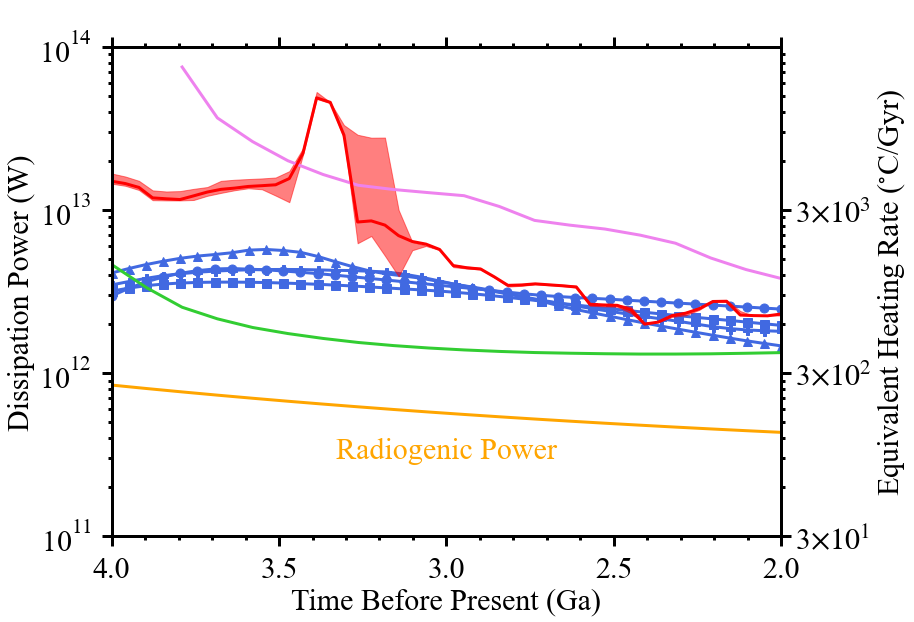

In [4]:
import matplotlib.pyplot as PLT
import matplotlib.ticker as TICK
import numpy as NP
import pandas as PD
import scipy.io 
from scipy.constants import Julian_year
from scipy.interpolate import CubicSpline as CSINTP
from scipy.interpolate import Akima1DInterpolator as AKINTP

def calculate_total_dissipation_power(data_time, data_re, time_interp_point):
        #-----------------------------#
        #Basic Parameters for the Moon#
        #-----------------------------#
        Rotation_Velocity = 7.2921e-5
        G_Constant = 6.6738e-11
        Mass_Earth = 5.9726e24 
        Mass_Moon = 7.3463e22
        Radius_Earth = 6.378e6##6371e3
        Distance_EM = 3.84399e8
        Moment_Inertia_Earth = 0.3299 * Mass_Earth * Radius_Earth**2
        Angular_Momentum = Moment_Inertia_Earth*Rotation_Velocity + Mass_Moon*(G_Constant*(Mass_Moon+Mass_Earth)*Distance_EM)**(1/2)
        Time_unit = Julian_year * 1e9

        interp_func_a = CSINTP(data_time, data_re)
        a_interp = interp_func_a(time_interp_point)

        interp_func_AKINTP = AKINTP(time_interp_point, a_interp)
        interp_deriv_a = interp_func_AKINTP.derivative()
        deriv_a_interp = interp_deriv_a(time_interp_point)
        Distance_interp = a_interp * Distance_EM

        deriv_Distance_interp = deriv_a_interp * Distance_EM / Time_unit
        AV_Moon = (G_Constant * (Mass_Moon+Mass_Earth) / Distance_interp**3)**(1/2)
        RV_Earth = (Angular_Momentum - Mass_Moon*(G_Constant * (Mass_Moon+Mass_Earth) * Distance_interp)**(1/2)) / Moment_Inertia_Earth
        Tidal_Torque = -0.5 * Mass_Moon * (G_Constant * (Mass_Moon+Mass_Earth) / Distance_interp)**(1/2) * deriv_Distance_interp
        Power_diff = Tidal_Torque * (RV_Earth - AV_Moon)
        return Power_diff
#---------------------------#
#Universal Figure Parameters#
#---------------------------#
PLT.rcParams['font.family'] = 'serif' ##rc: runtime configuration
PLT.rcParams['font.serif'] = ['Times New Roman']
PLT.rcParams['mathtext.fontset'] = 'stix' ##Times-like font used in mathtext
fig, ax = PLT.subplots(figsize=(12,9))
labelsize_ax = 30
ticksize_ax = 30
legendsize_ax = 30
textsize_ax = 30
linewidth_ax = 3
markersize_ax = 9
borderwidth_ax = 3

#-------------------------------#
#plot Webb, 1982                #
#data interpolation & derivation#
#-------------------------------#
models = NP.load('Data_From_Eulenfeld&Heubeck/data/orbit_models.npz')
data_Webb = models['Webb 1982 curve d'] # Time (Ga); distance (0,1), (normalized by present-day value)
time_interp_point = NP.linspace(2.0, 4.0, 20) ##

Power_diff_Webb = calculate_total_dissipation_power(data_Webb[0], data_Webb[1], time_interp_point)
Webb1982, = ax.plot(time_interp_point, Power_diff_Webb,  linestyle='-', zorder=2,
                    color='violet', linewidth=linewidth_ax, label="Webb, 1982")

#-------------------------------#
#plot Daher et al., 2021        #
#data interpolation & derivation#
#-------------------------------#
color_Daher = 'royalblue'
time_interp_point_Daher = NP.linspace(2.0, 4.0, 40) 
Distance_EM = 3.84399e8
#ocean basin geometries of 252 Ma#
data_252Ma = scipy.io.loadmat('Data_Daher2021/integration_results_use_Schindelegger_252Ma_experiments_ode45_nodeLF_v9.mat')
time_252Ma = data_252Ma['timestep_vector_252Ma_ode45'].flatten() / (86400 * 365.25 * 10**9)
a_RE_252Ma = data_252Ma['StateVector_252Ma_ode45'][:, 2] / Distance_EM
Power_diff_252Ma = calculate_total_dissipation_power(time_252Ma, a_RE_252Ma, time_interp_point_Daher)
Daher_252Ma, = ax.plot(time_interp_point_Daher, Power_diff_252Ma, color=color_Daher, linestyle='-', marker='^',markersize=markersize_ax,
                         linewidth=linewidth_ax, label="Daher et al. 2021", zorder=1)

#ocean basin geometries of 116 Ma#
data_116Ma = scipy.io.loadmat('Data_Daher2021/integration_results_use_Schindelegger_116Ma_experiments_ode45_nodeLF_v9.mat')
time_116Ma = data_116Ma['timestep_vector_116Ma_ode45'].flatten() / (86400 * 365.25 * 10**9)
a_RE_116Ma = data_116Ma['StateVector_116Ma_ode45'][:, 2] / Distance_EM
Power_diff_116Ma = calculate_total_dissipation_power(time_116Ma, a_RE_116Ma, time_interp_point_Daher)
Daher_116Ma, = ax.plot(time_interp_point_Daher, Power_diff_116Ma, color=color_Daher, linestyle='-', marker='P',markersize=markersize_ax,
                         linewidth=linewidth_ax, label="Daher et al. 2021", zorder=1)

# ocean basin geometries of 55 Ma
data_55Ma = scipy.io.loadmat('Data_Daher2021/integration_results_use_Schindelegger_55Ma_experiments_ode45_nodeLF_v9.mat')
time_55Ma = data_55Ma['timestep_vector_55Ma_ode45'].flatten() / (86400 * 365.25 * 10**9)
a_RE_55Ma = data_55Ma['StateVector_55Ma_ode45'][:, 2] / Distance_EM
Power_diff_55Ma = calculate_total_dissipation_power(time_55Ma, a_RE_55Ma, time_interp_point_Daher)
Daher_55Ma, = ax.plot(time_interp_point_Daher, Power_diff_55Ma, color=color_Daher, linestyle='-',marker='s',markersize=markersize_ax,
                         linewidth=linewidth_ax, label="Daher et al. 2021", zorder=1)

#ocean basin geometries of present-day#
data_PD = scipy.io.loadmat('Data_Daher2021/integration_results_use_Schindelegger_PD_experiments_ode45_nodeLF_v9.mat')
time_PD = data_PD['timestep_vector_PD_ode45'].flatten() / (86400 * 365.25 * 10**9) # Time (Ga)
a_RE_PD = data_PD['StateVector_PD_ode45'][:, 2] / Distance_EM # distance (0,1), (normalized by present-day value)
Power_diff_PD = calculate_total_dissipation_power(time_PD, a_RE_PD, time_interp_point_Daher)
Daher_PD, = ax.plot(time_interp_point_Daher, Power_diff_PD, color=color_Daher, linestyle='-', marker='o',markersize=markersize_ax,
                         linewidth=linewidth_ax, label="Daher et al. 2021", zorder=1)

#-------------------------------#
#plot Tyler et al., 2021        #
#data interpolation & derivation#
#-------------------------------#
data_Tyler_T40 = models['Tyler 2021 T=40']
Power_diff_Tyler = calculate_total_dissipation_power(data_Tyler_T40[0], data_Tyler_T40[1], time_interp_point)

Tyler2021_40, = ax.plot(time_interp_point, Power_diff_Tyler, linestyle='-', zorder=2,
                    color='limegreen', linewidth=linewidth_ax, label="Tyler (2021)")

#-------------------------------#
#plot Farhat et al., 2022       #
#data interpolation & derivation#
#-------------------------------#
from matplotlib.legend_handler import HandlerTuple
Radius_Earth = 6371e3
Distance_EM = 3.84399e8
time_interp_point_Farhat = NP.linspace(2.0, 4.0, 50)
path_data_Farhat = ('Farhat_2022.csv')
data_Farhat = NP.loadtxt(path_data_Farhat, delimiter=',', skiprows=1) 
time_Farhat = data_Farhat[:,0] #Column 0: Ga; 
a_RE_middle = data_Farhat[:,1] #Column 1: a(RE);
a_RE_max = data_Farhat[:,2] #Column 2: amax;
a_RE_min = data_Farhat[:,3] #Column 3: amin

Power_diff_middle = calculate_total_dissipation_power(time_Farhat, a_RE_middle*Radius_Earth/Distance_EM, time_interp_point_Farhat)
Power_diff_max = calculate_total_dissipation_power(time_Farhat, a_RE_max*Radius_Earth/Distance_EM, time_interp_point_Farhat)
Power_diff_min = calculate_total_dissipation_power(time_Farhat, a_RE_min*Radius_Earth/Distance_EM, time_interp_point_Farhat)

middle_line, = ax.plot(time_interp_point_Farhat, Power_diff_middle, linestyle='-', zorder=2,
                       color='red', linewidth=linewidth_ax, label="Farhat et al. (2022)")

envelope = ax.fill_between(time_interp_point_Farhat, Power_diff_min, Power_diff_max, 
                           color='red', alpha=0.5, zorder=2)

#----------------------------------#
#plot radiogenic heating power#
#based on Taylor & Wieczorek, 2014 #
#------------------------ ---------#
Mass_Moon = 7.3463e22
lamda =[9.8458e-10,1.5507e-10,5.5452e-10,4.9511e-11]
H =[5.69e-4,9.46e-5,2.92e-5,2.64e-5] #heat production rate, W/kg   
C =[20.3e-9*0.0071,20.3e-9*0.9928,36900e-9*1.19e-4, 79.5e-9]
HPR_time=(C[0]*H[0]*NP.exp(time_interp_point*lamda[0]*1e9)+C[1]*H[1]*NP.exp(time_interp_point*lamda[1]*1e9) \
                +C[2]*H[2]*NP.exp(time_interp_point*lamda[2]*1e9)+C[3]*H[3]*NP.exp(time_interp_point*lamda[3]*1e9)) ##W/kg
Power_radio = HPR_time * Mass_Moon

Taylor2006, = ax.plot(time_interp_point, Power_radio, linestyle='-',
                        color='orange', linewidth=linewidth_ax, label="Radiogenic Power")

#------------------------------#
#Universal Figure configuration#
#------------------------------#
ax.set_yscale('log')
ax.set_xlim(4.0,2.0)
ax.set_ylim(1.0e11,1.0e14)
ax.xaxis.set_major_locator(TICK.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(TICK.MultipleLocator(0.1))
ax.tick_params(axis='both',direction='out',length=10,labelsize=ticksize_ax,pad=10,which='both',width=borderwidth_ax)
ax.tick_params(axis='both',direction='out',length=4,labelsize=ticksize_ax,which='minor',width=borderwidth_ax)
ax.set_xlabel(f"Time Before Present (Ga)",fontsize=labelsize_ax)
ax.set_ylabel(f'Dissipation Power (W)',fontsize=labelsize_ax)
## top x axis
ax2=ax.twiny()
ax2.set_xlim(4.0,2.0)
ax2.xaxis.set_major_locator(TICK.MultipleLocator(0.5))
ax2.xaxis.set_minor_locator(TICK.MultipleLocator(0.1))
ax2.tick_params(axis='both',direction='out',which='both',length=10,labelsize=ticksize_ax,labelcolor='none',width=borderwidth_ax)
ax2.tick_params(axis='both',direction='out',which='minor',length=4,labelsize=ticksize_ax,width=borderwidth_ax) ##necessary
## right y axis
ax3=ax.twinx()
ax3.set_yscale('log')
ax3.set_ylim(1e11,1.0e14) 
ax3.set_yticks([1e11,1e12,1e13])
ax3.set_yticklabels([r"3$\times 10^1$",r"3$\times 10^2$",r"3$\times 10^3$"])
ax3.tick_params(axis='both',direction='out',which='both',length=10,labelsize=ticksize_ax,width=borderwidth_ax)
ax3.tick_params(axis='both',direction='out',which='minor',length=4,labelsize=ticksize_ax,width=borderwidth_ax) ##necessary
ax3.set_ylabel(r"Equivalent Heating Rate ($^{\circ}$C/Gyr)",fontsize=labelsize_ax)
## overall setting
for border in ['top', 'bottom', 'left', 'right']:
    ax.spines[border].set_linewidth(borderwidth_ax)

ax.text(3.0,3e11, "Radiogenic Power", color='orange', ha='center', size=textsize_ax)
#ax.text(3.0,3e11, "Taylor et al. 2006", color='orange', ha='center', size=textsize_ax)
#fig.savefig(f"Evolution_distance_interpolated.eps",bbox_inches='tight',transparent=True) ##change
fig.savefig(f"SubFigure_DissPwrEvolution.pdf",bbox_inches='tight',dpi=300, transparent=True) ##change
PLT.show()
PLT.close(fig)